IMPORTS

In [93]:
#Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure

#Options
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
plt.style.use('ggplot')
np.set_printoptions(threshold=sys.maxsize) #Number of rows to be shown by Numpy
pd.set_option("display.max_columns", None) #Number of columns to be shown by Pandas
pd.set_option("display.max_rows", None) #Number of rows to be shown by Pandas
#pd.set_option('display.float_format', lambda x: '%.2f' % x) #Number of decimals to be shown by Pandas

#Reading
df = pd.read_csv(r'C:\Users\aldan\Desktop\Data Analysis and Science\Data Analysis\Data Analysis Projects\Python Projects\Correlation - Finding Insights\movies.csv')


FIRST CHECKING THE DATA

In [94]:
a = df.describe()
b = df.dtypes

print ('{}\n{}'.format(a,b))

df.head()

              year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000  
name         object
rating       object
genre        object
year          int64
released     object
score       float

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


DATA CLEANING - CHECKING NULLS

In [95]:
#Nulls Percentage
print ('{}'.format('### PERCENTAGE OF NULLS PER COLUMN ###'))
for col in df.columns:                        
    pct_missing = round((np.mean(df[col].isnull()))*100,2)
    print ('{} - {}%'.format(col, pct_missing))

#Nulls Integer
print ('\n{}\n{}'.format('### INTEGER OF NULLS PER COLUMN ###', df.isnull().sum()))

#Types of Nulls (Blank, NaN, n/a) per Column
data= {
'runtime' : pd.Series(df.loc[df['runtime'].isnull(),'runtime'].unique()),
'rating' : pd.Series(df.loc[df['rating'].isnull(),'rating'].unique()),
'released' : pd.Series(df.loc[df['released'].isnull(),'released'].unique()),
'score' : pd.Series(df.loc[df['score'].isnull(),'score'].unique()),
'votes' : pd.Series(df.loc[df['votes'].isnull(),'votes'].unique()),
'writer' : pd.Series(df.loc[df['writer'].isnull(),'writer'].unique()),
'star' : pd.Series(df.loc[df['star'].isnull(),'star'].unique()),
'country' : pd.Series(df.loc[df['country'].isnull(),'country'].unique()),
'budget' : pd.Series(df.loc[df['budget'].isnull(),'budget'].unique()),
'gross' : pd.Series(df.loc[df['gross'].isnull(),'gross'].unique()),
'company' : pd.Series(df.loc[df['company'].isnull(),'company'].unique()),
}

df2 = pd.DataFrame(data)
print ('\n{}\n{}\n'.format('### TYPES OF NULLS PER COLUMN ###',df2))

#Print Rows with Null Values
df[df.isnull().any(axis=1)][0:10]


### PERCENTAGE OF NULLS PER COLUMN ###
name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.0%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%

### INTEGER OF NULLS PER COLUMN ###
name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

### TYPES OF NULLS PER COLUMN ###
   runtime rating released  score  votes writer star country  budget  gross  \
0      NaN    NaN      NaN    NaN    NaN    NaN  NaN     NaN     NaN    NaN   

  company  
0     NaN  



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
27,Raise the Titanic,PG,Action,1980,"August 1, 1980 (United States)",5.0,4100.0,Jerry Jameson,Adam Kennedy,Jason Robards,United Kingdom,36000000.0,NaN,ITC Films,115.0
30,My Bodyguard,PG,Comedy,1980,"September 26, 1980 (United States)",7.1,8900.0,Tony Bill,Alan Ormsby,Chris Makepeace,United States,NaN,22482952.0,Twentieth Century Fox,102.0
31,Prom Night,R,Horror,1980,"July 18, 1980 (United States)",5.4,16000.0,Paul Lynch,William Gray,Leslie Nielsen,Canada,NaN,14796236.0,Guardian Trust Company,92.0
32,Smokey and the Bandit II,PG,Action,1980,"August 15, 1980 (United States)",5.3,15000.0,Hal Needham,Hal Needham,Burt Reynolds,United States,NaN,66132626.0,Universal Pictures,100.0
34,Seems Like Old Times,PG,Comedy,1980,"December 19, 1980 (United States)",6.7,9100.0,Jay Sandrich,Neil Simon,Goldie Hawn,United States,NaN,43995918.0,Rastar Films,102.0


Plan: How to deal with Null Values if enough time

In [96]:
# Rating = Find the genre and/or company of the missing rating, and fill it with the median() of that group 
# Released = Extract the year from the 'year' column and then add the mode() of the months/days (Can be grouped by company) from the 'released' column. 
# Score = Find the genre and/or company of the missing score, and fill it with the mode() of that group 
# Votes = Find the genre and/or company of the missing vote, and fill it with the median() of that group 
# Writer = Writer is the same as Director in 2164/7668, low accurate, fill it with 'Unknown'
# Star = fill it with 'Unknown'
# Country = Extract it from the 'released' column
# Budget = fill it with 'Unknown'
# Gross = fill it with 'Unknown'
# Company = fill it with 'Unknown'
# Runtime = Find the genre and/or company of the missing runtime, and fill it with the median() of that group 

# Extras:
# Fix the 'Year' column, either delete it or make it match 'released'
# Fix the 'Company column, combine all the previous company's name in one general name

#SIMPLIFYING
df = df.dropna().reset_index(drop = True)


DATA CLEANING - Last Fixes

In [97]:
#Changing Datatypes
df['score'] = df['score'].astype(int)
df['votes'] = df['votes'].astype(int)
df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)
df['runtime'] = df['runtime'].astype(int)

#Deleting Negatives
df = df[df.gross > 0].reset_index(drop = True)


CORRELATION AND VISUALIZATION

In [98]:
#Corr's Statistics
np.corrcoef(df.budget, df.gross)
df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.056396,0.205973,0.328175,0.283780,0.074210
score,0.056396,1.000000,0.455581,0.062457,0.212714,0.393545
votes,0.205973,0.455581,1.000000,0.431864,0.613791,0.345443
budget,0.328175,0.062457,0.431864,1.000000,0.743536,0.311063
gross,0.283780,0.212714,0.613791,0.743536,1.000000,0.261947
runtime,0.074210,0.393545,0.345443,0.311063,0.261947,1.000000


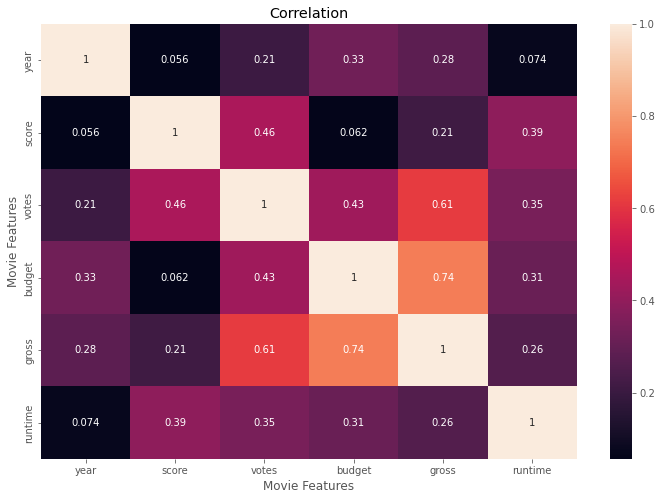

<Figure size 864x576 with 0 Axes>

In [99]:
#Heatmap of Numeric Values Only
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()
plt.clf()

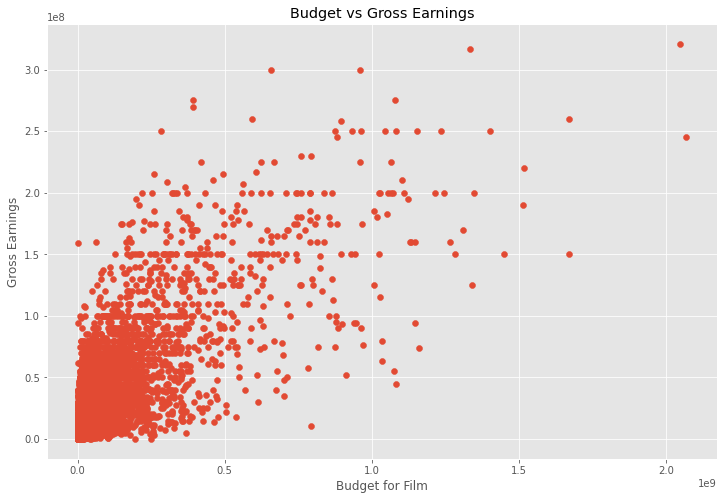

<Figure size 864x576 with 0 Axes>

In [100]:
#Scatter Plot
plt.scatter(y=df['budget'], x=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Film')
plt.show()
plt.clf()

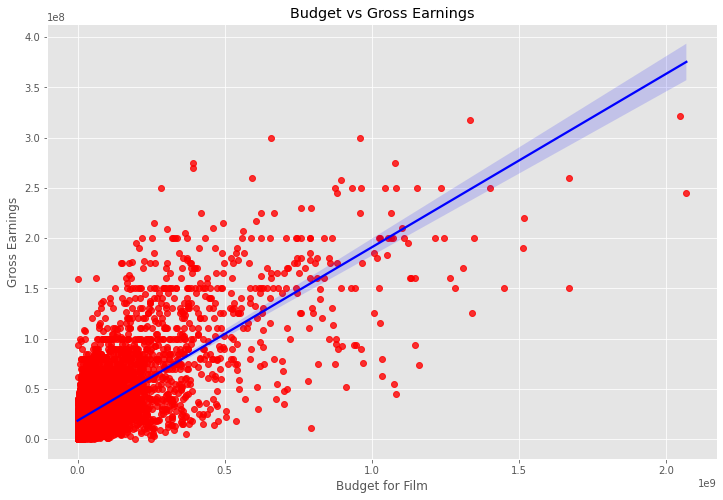

<Figure size 864x576 with 0 Axes>

In [105]:
#Regression Line 
sns.regplot(y=df['budget'], x=df['gross'], scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Budget vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Film')
plt.show()
plt.clf()

In [102]:
#Creating an independable copy of the Data Frame and Categorizing/Coding the objects 
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4690,6,6,1980,1303,8,927000,1795,2832,699,46,19000000,46998772,1426,146
1,3927,6,1,1980,1126,5,65000,1578,1158,214,47,4500000,58853106,452,104
2,3639,4,0,1980,1358,8,1200000,757,1818,1157,47,18000000,538375067,945,124
3,204,4,4,1980,1126,7,221000,889,1413,1474,47,3500000,83453539,1108,88
4,730,6,4,1980,1169,7,108000,719,351,271,47,6000000,39846344,1083,98


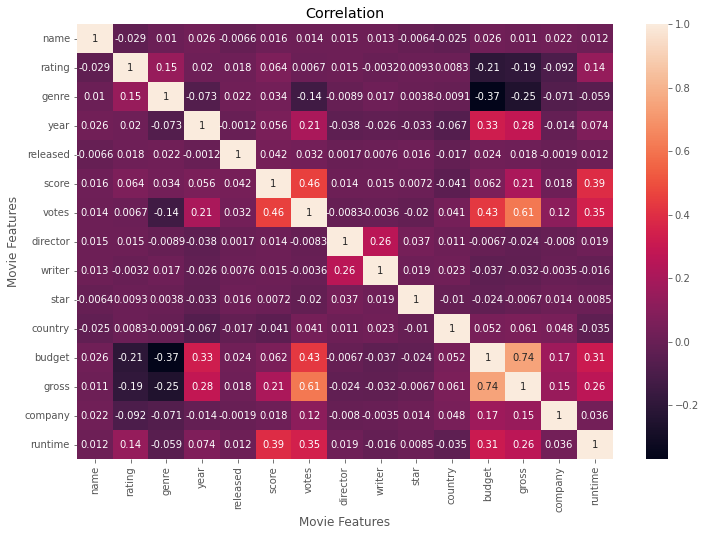

<Figure size 864x576 with 0 Axes>

In [103]:
#Heatmap of Numeric Values and Objects Converted to Numeric(Code)
sns.heatmap(df_numerized.corr(), annot=True)
plt.title('Correlation')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show()
plt.clf()

